<br>

<br>

# 👩🏻‍👩🏻‍👧🏻‍👦🏻 **SOCIODEMOGRAPHIC AND HEALTH RESOURCE DATA**👩🏻‍👩🏻‍👧🏻‍👦🏻

**LINEAR REGRESSION MODEL USING PANDAS AND PYTHON**

<br>

## **INDEX**

- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**


<br>

## **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

**1.1. PROBLEM DEFINITION**

This project analyzes US county-level sociodemographic and health resource data collected between 2018 and 2019.  Understanding the interplay between **these factors is crucial for informing public health policy, resource allocation, and intervention strategies.**

Variations in health outcomes across different counties may be influenced by both the availability of health resources and the specific sociodemographic characteristics of the population.



**Problem Statement:**  The core problem this project addresses is determining the relationship between sociodemographic factors and health resources at the county level in the United States.  Specifically, we aim to identify which sociodemographic variables are most strongly associated with the availability and utilization of health resources.

<br>

**1.2. LIBRARY IMPORTING**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


from scipy.stats import skew, kurtosis  # Importar las funciones necesarias

**1.3. DATA COLLECTION**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


<br>

## **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Data Exploration.
- 2.2. Data Cleaning.
- 


<br>

**2.1. DATA EXPLORATION**

In [4]:
df.shape

(3140, 108)

This DataFrame contains **3140 ROWS** and **108 COLUMNS**

<br>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [7]:
df.nunique()

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [8]:
print("THESE ARE ALL THE COLUMNS OF THE DATASET:")
print(df.columns.tolist())

THESE ARE ALL THE COLUMNS OF THE DATASET:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or hi

<br>

**2.2. DATA CLEANING**

In [9]:
# Check for missing values
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

**OBSERVATIONS:** The result shows that no columns in the DataFrame have any missing values.

<br>

In [10]:
# Drop irrelevant columns
df.drop(columns=['fips'], inplace=True)

print("\nUpdated Dataset Shape after dropping irrelevant columns:", df.shape)



Updated Dataset Shape after dropping irrelevant columns: (3140, 107)


- **Why 'fips'?** Because it's just a county identifier and doesn't help with the predictive analysis.
- **Effect:** The dataset shape changes from (3140, 108) to (3140, 107), confirming that one column was removed.

<br>

In [11]:
df.shape

(3140, 107)

In [12]:
duplicates = df.duplicated().sum()
print(f"\nNUMBER OF DUPLICATE ROWS: {duplicates}")


NUMBER OF DUPLICATE ROWS: 0


In [13]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')


**Data Formatting**
- Ensure all categorical variables are properly encoded.
- Standardize column names (if needed).

<br>

## **STEP 3: UNIVARIATE VARIABLE ANALYSIS**

- 3.1. Distribution of numerical variables.
- 3.2. 

**OBJECTIVE OF UNIVARIATE VARIABLE ANALYSIS:** Univariate variable analysis focuses on examining each variable individually to understand its distribution, central tendency, spread, and potential anomalies. This step helps in:

-  Identifying data patterns (normal vs. skewed distributions).
-  Detecting outliers that may affect model performance.
-  Understanding variable importance before feature selection.
-  Deciding on transformations (e.g., normalization, log scaling) for better model performance.


**3.1. DISTRIBUTION OF NUMERICAL VARIABLES**

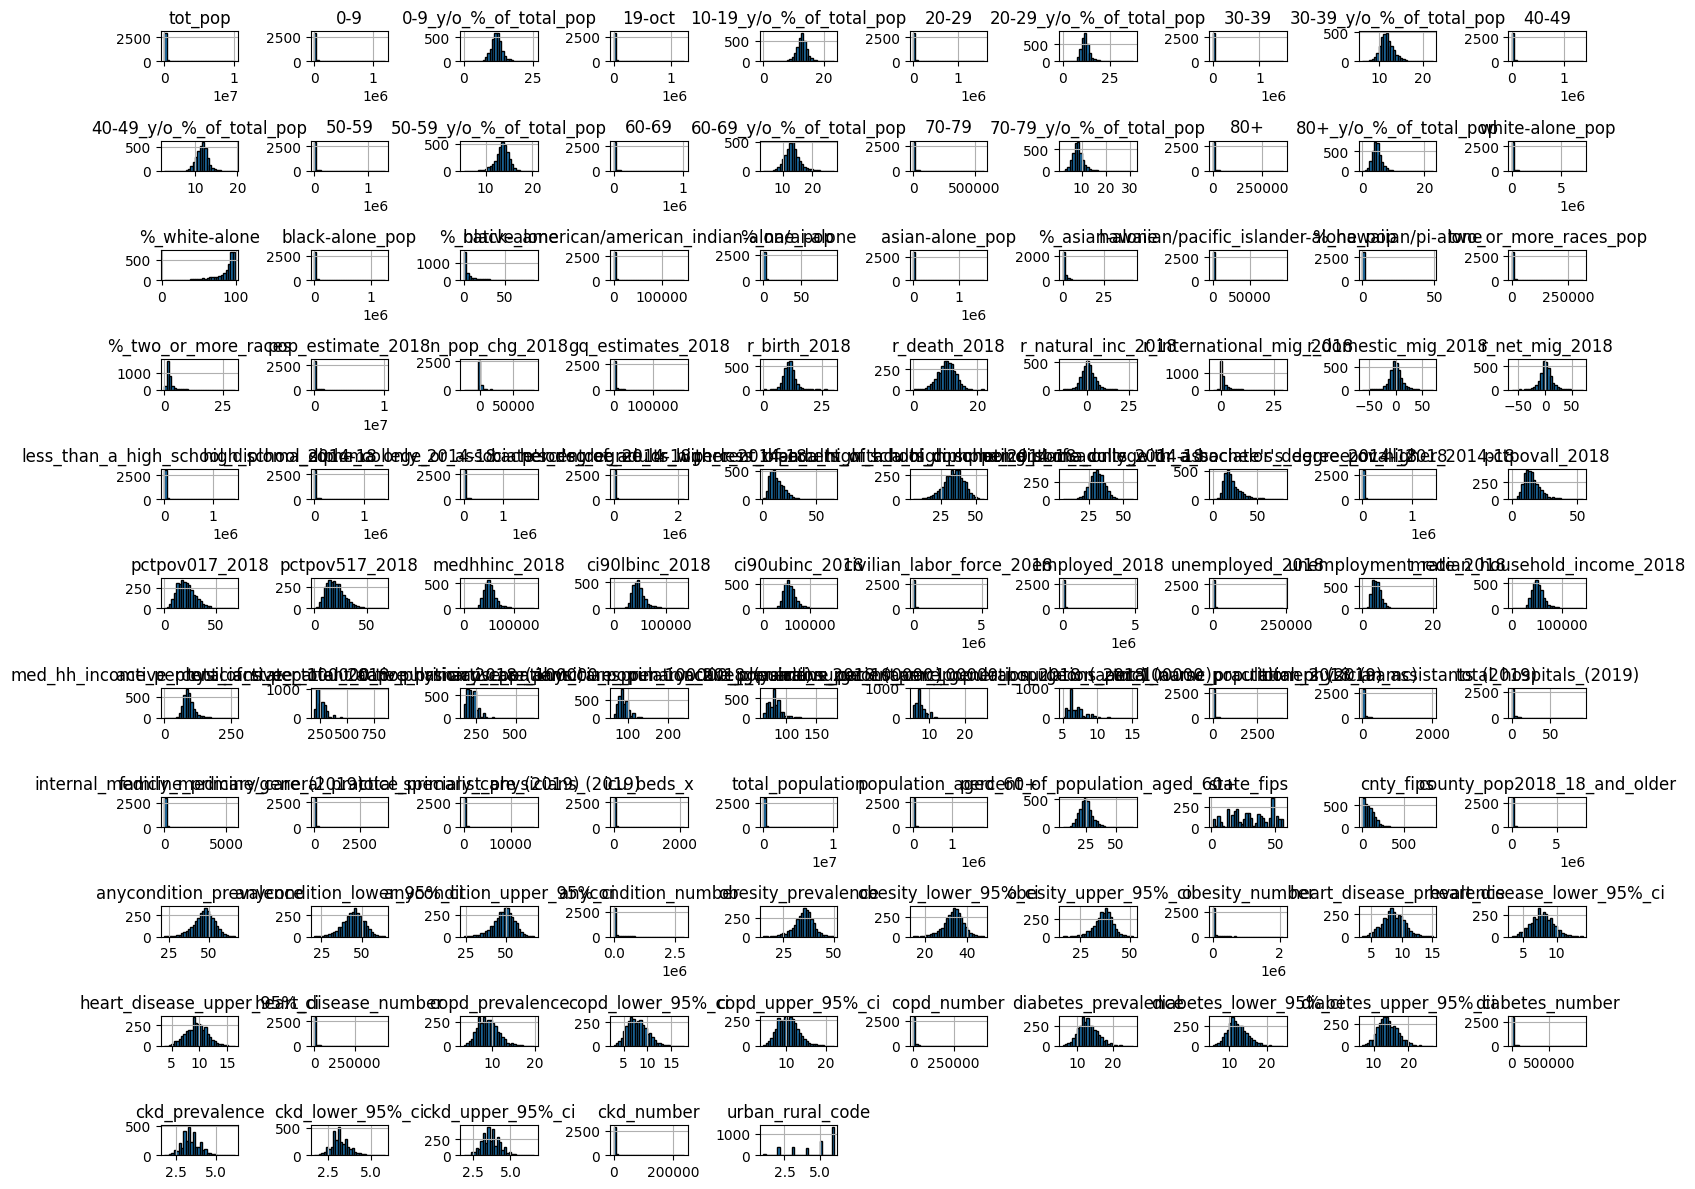

In [14]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical variables
df[numerical_columns].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [15]:
from scipy.stats import zscore
import numpy as np

# Compute Z-scores
z_scores = np.abs(df[numerical_columns].apply(zscore))

# Identify outliers (Z-score > 3)
outliers = (z_scores > 3).sum()
print("\nNumber of outliers per feature:\n", outliers)



Number of outliers per feature:
 tot_pop                     39
0-9                         42
0-9_y/o_%_of_total_pop      42
19-oct                      43
10-19_y/o_%_of_total_pop    37
                            ..
ckd_prevalence              19
ckd_lower_95%_ci            24
ckd_upper_95%_ci            19
ckd_number                  36
urban_rural_code             0
Length: 105, dtype: int64


In [16]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Ver primeras filas
numerical_df.head()


,tot_pop,0-9,0-9_y/o_%_of_total_pop,19-oct,10-19_y/o_%_of_total_pop,20-29,20-29_y/o_%_of_total_pop,30-39,30-39_y/o_%_of_total_pop,40-49,...,copd_number,diabetes_prevalence,diabetes_lower_95%_ci,diabetes_upper_95%_ci,diabetes_number,ckd_prevalence,ckd_lower_95%_ci,ckd_upper_95%_ci,ckd_number,urban_rural_code
0,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,3038,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,7474,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [17]:
# Resumen estadístico general
summary = numerical_df.describe().T  # Transponer para mejor visualización

In [18]:

# Filtrar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular estadísticas básicas
summary = numerical_df.describe().T

# Agregar skewness y kurtosis
summary['skewness'] = numerical_df.apply(skew)
summary['kurtosis'] = numerical_df.apply(kurtosis)

# Mostrar los primeros resultados
print(summary.head())

# Guardar el resumen en un archivo CSV si necesitas revisarlo
summary.to_csv("statistical_summary.csv")


                           count           mean            std   min  \
tot_pop                   3140.0  104189.412420  333583.395432  88.0   
0-9                       3140.0   12740.302866   41807.301846   0.0   
0-9_y/o_%_of_total_pop    3140.0      11.871051       2.124081   0.0   
19-oct                    3140.0   13367.976752   42284.392134   0.0   
10-19_y/o_%_of_total_pop  3140.0      12.694609       1.815044   0.0   

                                   25%           50%           75%  \
tot_pop                   10963.250000  25800.500000  67913.000000   
0-9                        1280.500000   3057.000000   8097.000000   
0-9_y/o_%_of_total_pop       10.594639     11.802727     12.951840   
19-oct                     1374.500000   3274.000000   8822.250000   
10-19_y/o_%_of_total_pop     11.674504     12.687422     13.659282   

                                   max   skewness    kurtosis  
tot_pop                   1.010552e+07  13.567324  306.892044  
0-9               